In [20]:
import numpy as np 
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from scipy import stats
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

traffic = pd.read_csv('/Users/aayushbhargava/Downloads/traffic/Train.csv')
traffic_test = pd.read_csv('/Users/aayushbhargava/Downloads/traffic/Test.csv')
traffic.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [21]:
traffic.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,3240.118163
std,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,1991.487289
min,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,1165.250000
50%,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,3335.000000
75%,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,4926.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,7280.000000


In [22]:
#---------------------------------------------------------------------------Convert time to utc
for num,val in enumerate(traffic['date_time']):
    dt_obj = datetime.strptime(val,'%Y-%m-%d %H:%M:%S')
    timestamp = dt_obj.weekday()+1
    #timestamp = datetime.timestamp(dt_obj)
    traffic.at[num,'date_time']=(timestamp)
    
for num,val in enumerate(traffic_test['date_time']):
    dt_obj = datetime.strptime(val,'%Y-%m-%d %H:%M:%S')
    timestamp = dt_obj.weekday()+1
    traffic_test.at[num,'date_time']=(timestamp)
    
traffic_test['date_time']=np.asarray(traffic_test['date_time'], dtype=np.float64)
traffic['date_time']=np.asarray(traffic['date_time'], dtype=np.float64)
type(traffic['date_time'][0])

numpy.float64

In [23]:
numeric_data = traffic.select_dtypes(include=[np.number])
cat_data = traffic.select_dtypes(exclude=[np.number])
print ('Numeric_data= '+str(numeric_data.shape[1])+'\nNonnumeric_data= '+str(cat_data.shape[1]))

Numeric_data= 12
Nonnumeric_data= 3


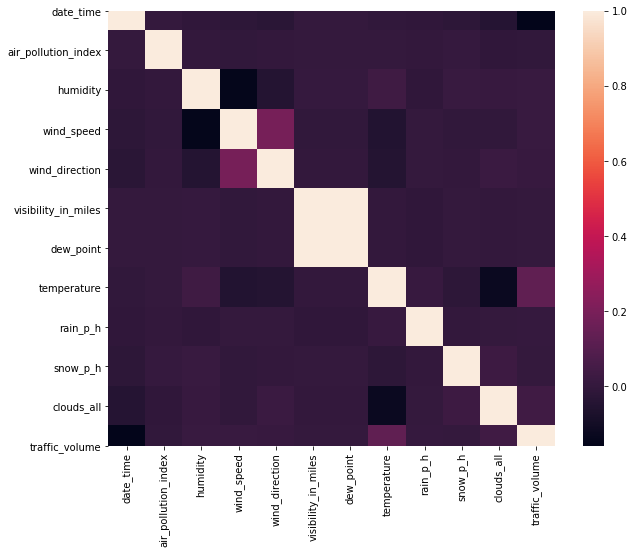

In [24]:
corr = numeric_data.corr()
sns.heatmap(corr)

In [25]:
print (corr['traffic_volume'].sort_values(ascending=True), '\n')

date_time             -0.157231
air_pollution_index   -0.003751
snow_p_h               0.001197
visibility_in_miles    0.001348
dew_point              0.001348
rain_p_h               0.005642
wind_direction         0.014278
wind_speed             0.016329
humidity               0.016455
clouds_all             0.037922
temperature            0.127871
traffic_volume         1.000000
Name: traffic_volume, dtype: float64 



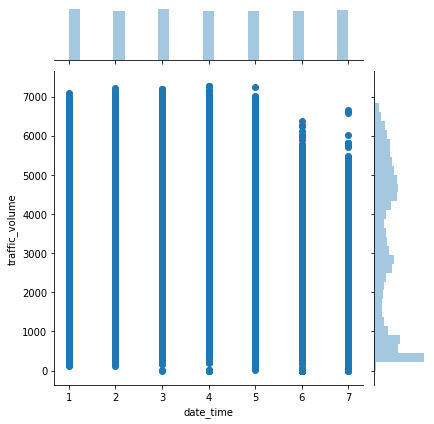

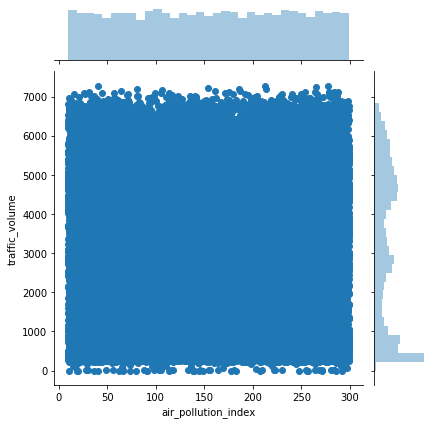

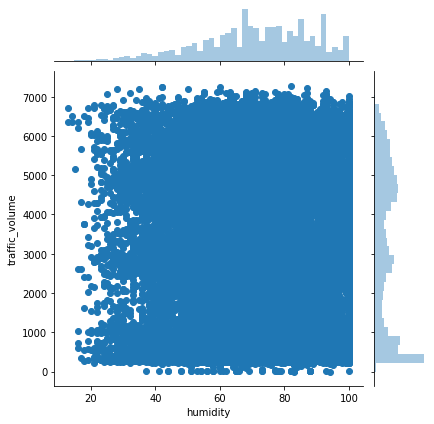

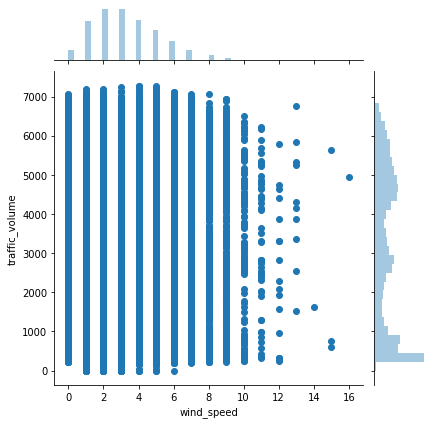

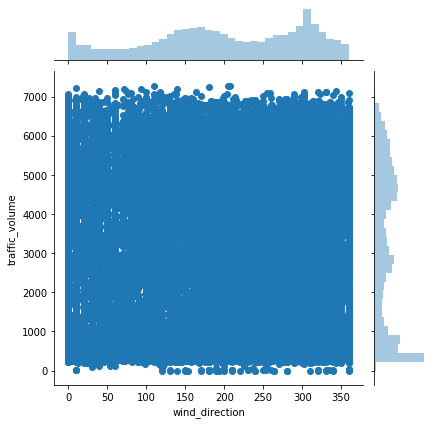

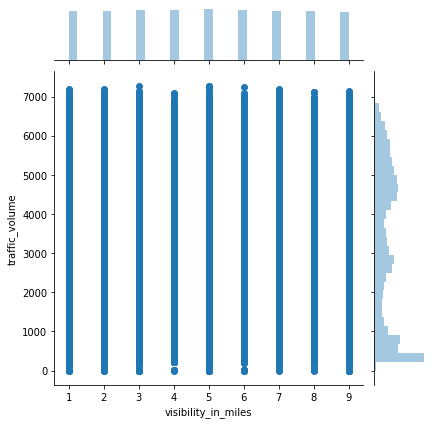

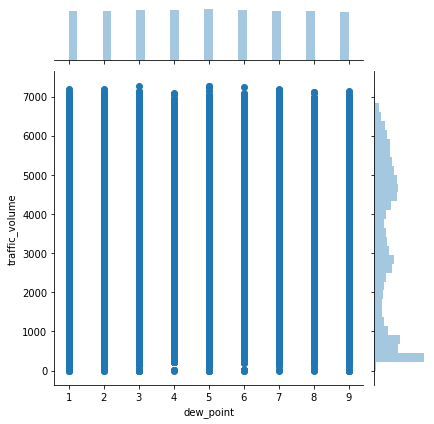

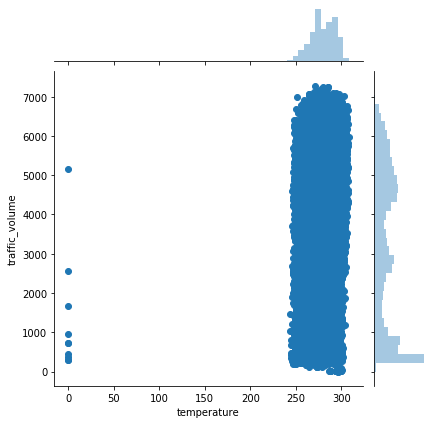

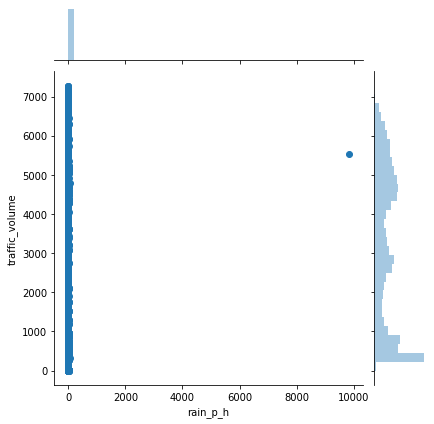

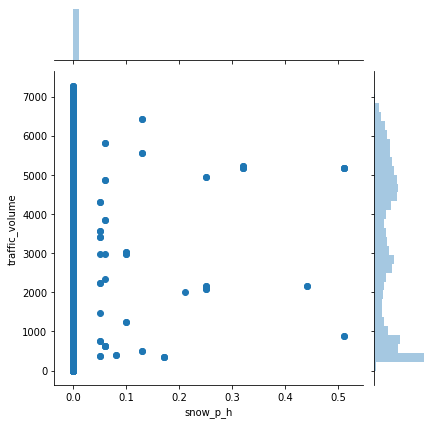

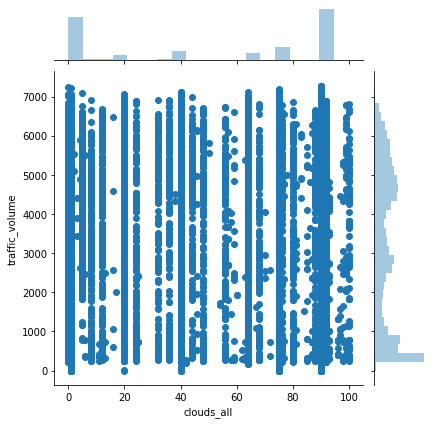

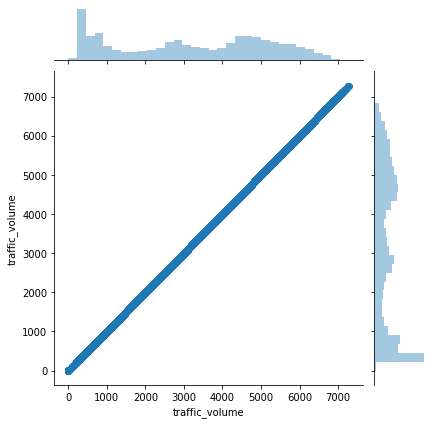

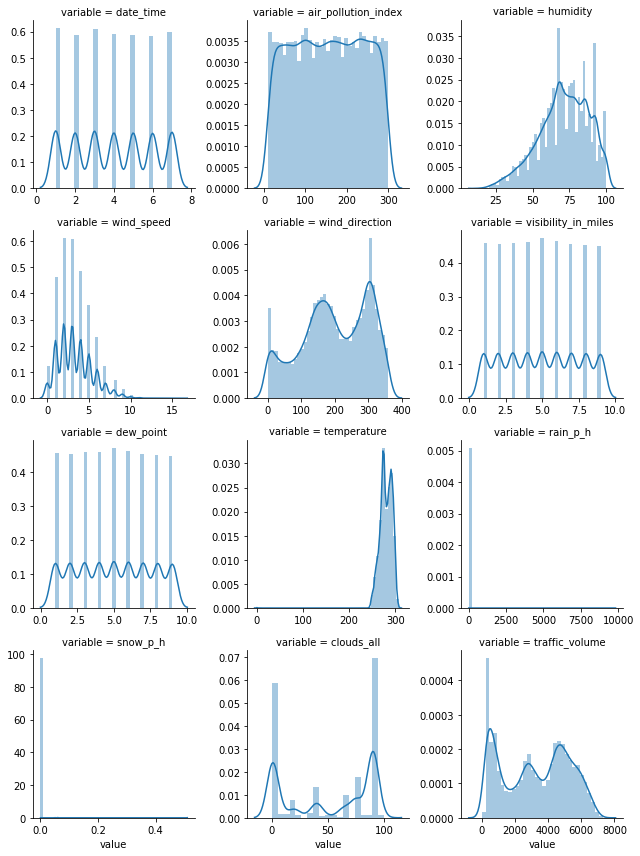

In [26]:
num = [f for f in traffic.columns if traffic.dtypes[f] != 'object']
nd = pd.melt(traffic, value_vars = num)
for numm in num:
    sns.jointplot(x=traffic[numm], y=traffic['traffic_volume'])

n1 = sns.FacetGrid (nd, col='variable', col_wrap=3, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

/Applications/anaconda/anaconda2/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda/anaconda2/lib/python3.6/site-packages/pandas/core/frame.py:4239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


              features           pval   disparity
2  weather_description  1.893282e-122  280.277070
1         weather_type   1.401964e-92  211.499954
0           is_holiday   2.225598e-09   19.923240


<module 'matplotlib.pyplot' from '/Applications/anaconda/anaconda2/lib/python3.6/site-packages/matplotlib/pyplot.py'>

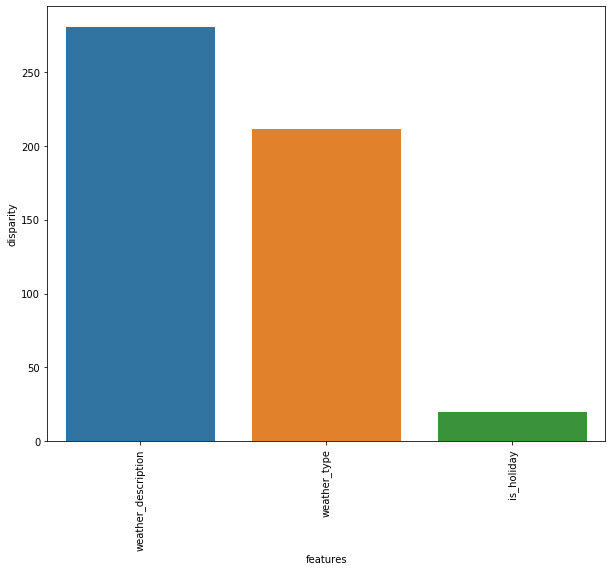

In [27]:
cat = [f for f in traffic.columns if traffic.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['traffic_volume'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data = traffic.select_dtypes(exclude=[np.number])
cat_data['traffic_volume'] = traffic.traffic_volume.values
cat_data.fillna('', inplace=True)
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
print (k)
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt

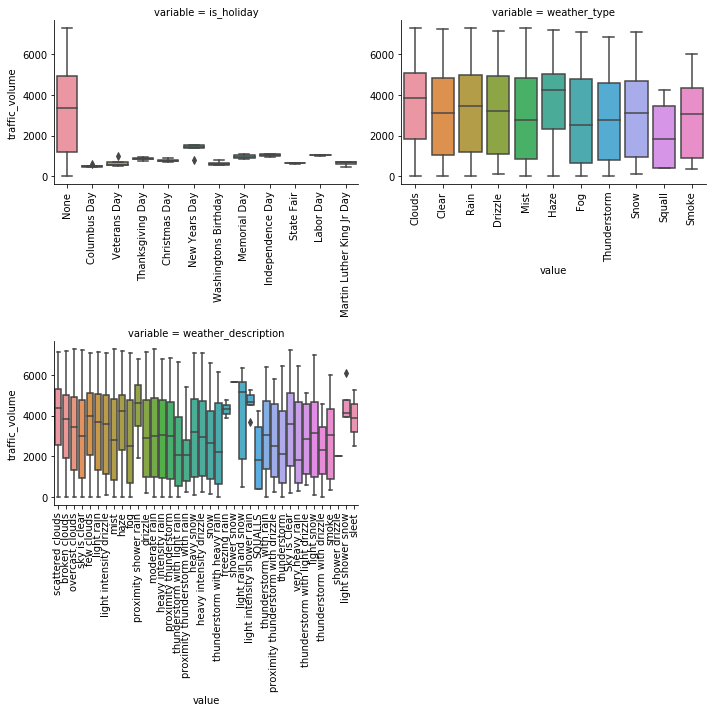

In [28]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in traffic.columns if traffic.dtypes[f] == 'object']

p = pd.melt(traffic, id_vars='traffic_volume', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','traffic_volume')
g

In [29]:
'''
Porcessing data for all non-numerical values
Label Encoding
'''
#traffic = pd.read_csv('/Users/aayushbhargava/Downloads/traffic/Train.csv')


maxx=traffic['traffic_volume'].max()
minn=traffic['traffic_volume'].min()

le = LabelEncoder()
traffic['weather_description'] = le.fit_transform(traffic['weather_description'])
traffic['weather_type'] = le.fit_transform(traffic['weather_type'])


for num,val in enumerate(traffic['is_holiday']):
    if val=='None':
        traffic.at[num,'is_holiday']=1
    else:
        traffic.at[num,'is_holiday']=0

traffic['is_holiday']=np.asarray(traffic['is_holiday'], dtype=np.int64)


traffic.drop(traffic[traffic['temperature'] < 150].index, inplace=True)
traffic_test.drop(traffic_test[traffic_test['temperature'] < 150].index, inplace=True)
fff=['temperature','clouds_all','wind_direction','humidity','air_pollution_index','traffic_volume']
lis=[]
global eer

for ffi in fff:
    try:
        if ffi=='traffic_volume':
            print ('in it')
            ss=np.asarray(traffic[ffi]).reshape(-1,1)
            eer = MinMaxScaler(feature_range = (0,1))
            eer.fit(ss)
            traffic[ffi] = eer.transform(ss)
            
        else:
            r='scaler_'+ffi+'_traffic'
            r = preprocessing.MinMaxScaler(feature_range = (0,1))
            ss=np.asarray(traffic[ffi]).reshape(-1,1)
            traffic[ffi] = r.fit_transform(ss)

            rr='scaler_'+ffi+'_traffic_test'
            rr = preprocessing.MinMaxScaler(feature_range = (0,1))
            ss=np.asarray(traffic_test[ffi]).reshape(-1,1)
            traffic_test[ffi] =rr.fit_transform(ss)
        
        
    except:
        pass


traffic_test['weather_description'] = le.fit_transform(traffic_test['weather_description'])
traffic_test['weather_type'] = le.fit_transform(traffic_test['weather_type'])
for num,val in enumerate(traffic_test['is_holiday']):
    if val=='None':
        traffic_test.at[num,'is_holiday']=1
    else:
        traffic_test.at[num,'is_holiday']=0
traffic_test['is_holiday']=np.asarray(traffic_test['is_holiday'], dtype=np.int64)



#traffic['traffic_volume']=np.asarray(traffic['traffic_volume'], dtype=np.float64)


traffic.head()

in it


,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2.0,1,0.384083,0.873563,2,0.913889,1,1,0.692213,0.0,0.0,0.40,1,24,0.761676
1,2.0,1,0.581315,0.620690,3,0.916667,1,1,0.708867,0.0,0.0,0.75,1,2,0.620330
2,2.0,1,0.356401,0.609195,3,0.913889,2,2,0.712259,0.0,0.0,0.90,1,19,0.654808
3,2.0,1,0.034602,0.609195,3,0.913889,5,5,0.720740,0.0,0.0,0.90,1,19,0.690385
4,2.0,1,0.937716,0.597701,3,0.913889,7,7,0.736315,0.0,0.0,0.75,1,2,0.675549


In [30]:
# Testing inverse transformation
print(eer.inverse_transform([traffic['traffic_volume']]))

[[5545. 4516. 4767. ... 2194. 1328. 1328.]]


In [31]:
'''
Dropping and Adjusting cols
'''

traffic=traffic.drop(columns='snow_p_h')
traffic=traffic.drop(columns='visibility_in_miles')
traffic=traffic.drop(columns='dew_point')
traffic=traffic.drop(columns='rain_p_h')

traffic_test=traffic_test.drop(columns='snow_p_h')
traffic_test=traffic_test.drop(columns='visibility_in_miles')
traffic_test=traffic_test.drop(columns='dew_point')
traffic_test=traffic_test.drop(columns='rain_p_h')

labels = pd.DataFrame(traffic['traffic_volume'], index=traffic.index)
#traffic=traffic.drop(columns='traffic_volume')

In [12]:
#sss=np.asarray(labels).reshape(-1, 1) 
print(eer.fit(labels).inverse_transform(labels))

[[0.76167582]
 [0.62032967]
 [0.65480769]
 ...
 [0.30137363]
 [0.18241758]
 [0.18241758]]


In [ ]:
x_train=[]
x_label=[]
for i in range(6,len(traffic)):
    for z in range(i-6,i):
        result=traffic.iloc[i-6]
        for z in range(i-6,i-1):
            result = pd.concat([result,traffic.iloc[z+1]],ignore_index=True)
    x_train.append(result)
    x_label.append(labels.iloc[i])
x_train,x_label=np.array(x_train),np.array(x_label)
x_t,x_l=np.array(x_train),np.array(x_label)

In [ ]:
# need to workon it as it dont have column of traffic vol so shape of traffic is 11 and its testing is 10
'''
y_test=[]
y_label=[]
for i in range(6,len(traffic_test)):
    for z in range(i-6,i):
        result=traffic.iloc[i-6]
        for z in range(i-6,i-1):
            result = pd.concat([result,traffic.iloc[z+1]],ignore_index=True)
    x_train.append(result)
    x_label.append(labels.iloc[i])
x_train,x_label=np.array(x_train),np.array(x_label)
x_t,x_l=np.array(x_train),np.array(x_label)
'''


In [ ]:
X_train = np.reshape(x_t, (x_t.shape[0], x_t.shape[1], 1))

In [ ]:
np.save('/Users/aayushbhargava/Downloads/traffic/X_train_simple.npy', X_train)
np.save('/Users/aayushbhargava/Downloads/traffic/x_l_simple.npy', x_l)

In [327]:
#Reviving saved nparrays back
#X_train = np.load('/Users/aayushbhargava/Downloads/traffic/X_train_simple.npy')
#x_l = np.load('/Users/aayushbhargava/Downloads/traffic/x_l_simple.npy')

In [328]:
r=int(X_train.shape[0]*.8)
traffic_lab=X_train[:r]
label_lab=x_l[:r]

traffic_val=X_train[r:]
label_val=x_l[r:]

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

model.summary()

In [ ]:
model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['accuracy'])

In [ ]:

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.fit(traffic_lab, 
          label_lab, 
          epochs=50,
          batch_size=512,
          validation_data=(traffic_val,label_val),
          verbose=1, 
          callbacks=[early_stop])

In [ ]:
from sklearn.externals import joblib
filename = '/Users/aayushbhargava/Downloads/traffic/finalizedd_model.pkl'
joblib.dump(model,filename)

In [329]:
#Reviving joblib dumper model
#model = joblib.load(filename)

In [330]:
p=model.predict(traffic_val)
x=mean_squared_error(label_val,p)
print ('score: '+str(max(0,(100-np.sqrt(x)))))

score: 99.90350517200824


In [ ]:
model.evaluate(traffic_val,label_val)

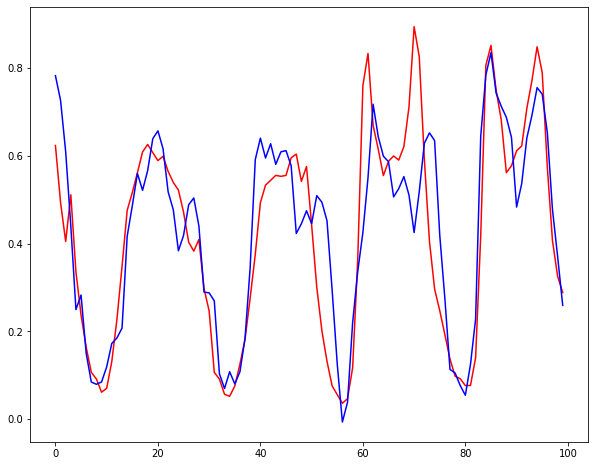

In [331]:
predicted=model.predict(traffic_val[0:100])
actual=label_val[0:100]
plt.plot(actual, color = 'red', label = 'Real Traffic Volume')
plt.plot(predicted, color = 'blue', label = 'Predicted Traffic Volume')
plt.show()